# Notes

In [1]:
import pandas as pd
from constants import *
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow
import os
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage

from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder

from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer

from geography.specific.colombian_municipalities import ColombianMunicipalities



/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
fuentes_incluidas = [GoldStockPrice, Malaria]
target_col = 'malaria_num_cases_total'

In [6]:
flow = CustomFlow(ID = 'basic_malaria',
                    name = "Basic Malaria",
                    time_resolution = MONTH,
                    geography= ColombianMunicipalities(),
                    vector_data_sources=fuentes_incluidas,
                    matrix_data_sources=[],
                    embedder=LinearRegressionCoefficientEmbedder(target_col=target_col),
                    clusterer=SklearnVectorClusterer(ID="kmeans", name="K-Means", sklearn_clusterer= KMeans(n_clusters=5)))


In [8]:


# Loads Data
# ----------------------
flow.df_vector, flow.df_matrix = flow.loadData(flow.geography)
flow.data_loaded = True


Loads Vector Data
Found 2 elements
   Extracts 1 of 2: Gold Stock Price (gold_stock_price) 
   Extracts 2 of 2: Malaria (malaria) 
Done

Loads Matrix Data
Found 0 elements
Done
------------------


In [5]:
flow.df_vector

,ID,date,gold_stock_price_value,malaria_num_cases
0,54743,2006-01-31,NaN,569.743717
1,52352,2006-01-31,NaN,894.454923
2,25019,2006-01-31,NaN,870.375268
3,19300,2006-01-31,NaN,729.977210
4,68547,2006-01-31,NaN,449.429277
...,...,...,...,...
215419,5541,2021-12-31,1791.045443,NaN
215420,23189,2021-12-31,1791.045443,NaN
215421,15600,2021-12-31,1791.045443,NaN
215422,23162,2021-12-31,1791.045443,NaN


In [6]:
# Embbeds Data
# ----------------------
flow.embeddData()
flow.data_embedded = True

flow.df_embedded_vector

KeyError: 'malaria_num_cases_total'

In [7]:
# Clusters Data
# ----------------------
flow.clusterData()
flow.data_clustered = True
flow.clustered_ids

,ID,cluster_id
0,44847,2
1,44110,0
2,44650,3
3,44560,3
4,54172,3
...,...,...
1117,5483,1
1118,5266,3
1119,5480,2
1120,5475,0


In [8]:
# Builds final geography
# ----------------------
flow.buildFinalGeography()


In [9]:
flow.final_geography

,ID,geometry
0,0,"MULTIPOLYGON (((-77.22701 0.68015, -77.22704 0..."
1,1,"MULTIPOLYGON (((-77.48686 1.26153, -77.48678 1..."
2,2,"MULTIPOLYGON (((-77.56230 0.93689, -77.56225 0..."
3,3,"MULTIPOLYGON (((-76.18574 0.65018, -76.18577 0..."
4,4,"MULTIPOLYGON (((-76.64121 0.25731, -76.65128 0..."


<AxesSubplot:>

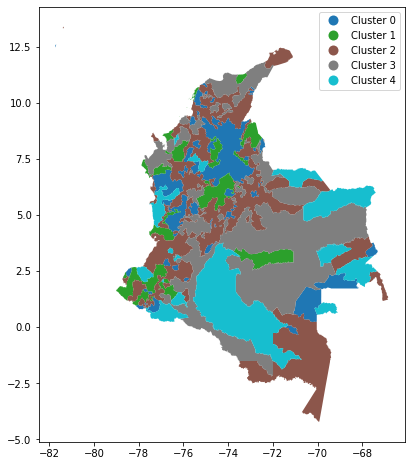

In [10]:
flow.final_geography[CLUSTER_ID] = flow.final_geography[ID].apply(lambda i : f"Cluster {i}")
flow.final_geography.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)

In [13]:
df =pd.DataFrame(flow.clusterer.sklearn_clusterer.cluster_centers_)
df.columns = flow.df_embedded_vector.columns[1:]
df

,coca_coca_total,gold_stock_price_value
0,-0.042418,0.178869
1,0.396672,-0.015313
2,-0.011634,-0.095204
3,0.017010,-0.335084
4,-0.422757,-0.338038
